In [1]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = []
image = nib.load('./ADNI_011_S_0010_PET_30_min_3D_FDG_4i_16s__br_raw_20051114113046731_1_S10060_I8664.nii')
dataset.append(np.array(image.get_fdata())[:,:,:,0]/np.array(image.get_fdata())[:,:,:,0].max())
dataset = np.array(dataset)

In [3]:
subject = dataset[0]

In [4]:
converted_to_array = []
for x in range(dataset[0].shape[0]):
    for y in range(dataset[0].shape[1]):
        for z in range(dataset[0].shape[2]):
            converted_to_array.append([x,y,z,subject[x,y,z]])
            
converted = np.array(converted_to_array)
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(converted)

In [5]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

## K-Means

In [ ]:
wcss = []
for i in range(1,10):
    k_clusters = KMeans(n_clusters=i)
    k_clusters.fit(scaled_dataset)
    wcss.append(k_clusters.inertia_)

plt.plot(wcss)
plt.show()
    

In [7]:
n_clusters = 5

In [22]:
k_clusters = KMeans(n_clusters=n_clusters)
k_clusters.fit(scaled_dataset)

KMeans(n_clusters=5)

In [23]:
lables = k_clusters.predict(scaled_dataset)

In [24]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in range(n_clusters):
    blank = np.zeros(shape)
    for x,y,z,_ in converted[lables==i]:
        blank[int(x),int(y),int(z)] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [25]:
level =36

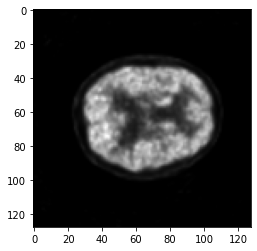

In [26]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

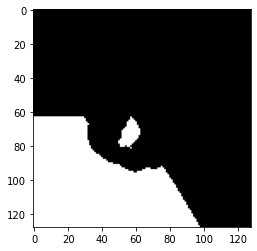

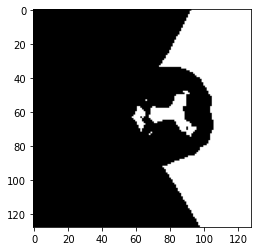

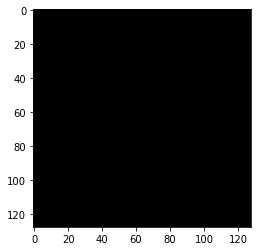

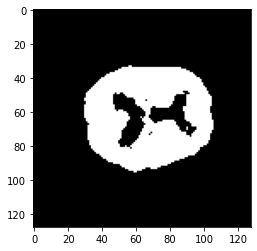

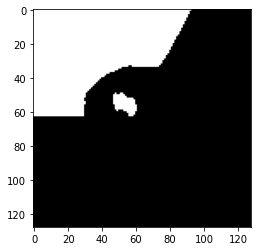

In [27]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.434,min_samples=15)
lables = dbscan.fit_predict(scaled_dataset)

In [ ]:
#Creating Segments
segments = []
shape = dataset[0].shape
for i in range(n_clusters):
    blank = np.zeros(shape)
    for x,y,z,_ in converted[lables==i]:
        blank[int(x),int(y),int(z)] = 1.0
            
    
    segments.append(blank)

segments = np.array(segments)

In [ ]:
level = 36

In [ ]:
plt.imshow(dataset[0][:,:,level],cmap='gray')
plt.show()

In [ ]:
for seg in segments:
    plt.imshow(seg[:,:,level],cmap='gray')
    plt.show()

In [ ]:
for i in set(lables):

    s = 0
    cnt = 0
    for c in np.array(clusters)[lables==i]:
        cnt += len(c.voxels.keys())
        for v in c.voxels.keys():
            s += dataset[0][v]
    print("For cluster ",i," mean = ",s/cnt)
            